# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset berjudul E-Commerce Shipping Data yang diambil dari Keggle pada link berikut : https://www.kaggle.com/datasets/prachi13/customer-analytics
   
2. **Content Dataset**:
   Dataset yang digunakan untuk pembangunan model berisi 10999 observasi dari 12 variabel. Data ini mengandung informasi berikut:
   - ID: Nomor ID Pelanggan.
   - Warehouse block: Perusahaan memiliki Gudang besar yang dibagi menjadi blok seperti A, B, C, D, E.
   - Mode of shipment: Perusahaan mengirim produk dengan berbagai cara seperti Kapal, Penerbangan, dan Jalan.
   - Customer care calls: Jumlah panggilan yang dilakukan untuk menanyakan pengiriman.
   - Customer rating: Perusahaan telah memberikan penilaian dari setiap pelanggan. 1 adalah yang terendah (Terburuk), 5 adalah yang tertinggi (Terbaik).
   - Cost of the product: Biaya Produk dalam Dolar AS.
   - Prior purchases: Jumlah Pembelian Sebelumnya.
   - Product importance: Perusahaan telah mengkategorikan produk dalam berbagai parameter seperti rendah, sedang, tinggi.
   - Gender: Laki-laki dan Perempuan.
   - Discount offered: Diskon yang ditawarkan pada produk tertentu.
   - Weight in gms: Ini adalah berat dalam gram.
   - Reached on time: Ini adalah variabel target, di mana 1 menunjukkan bahwa produk TIDAK sampai tepat waktu dan 0 menunjukkan bahwa produk telah sampai tepat waktu.


# **2. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [25]:
df = pd.read_csv('../ecommerce_shipping_data/ecommerce_shipping_data.csv')
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## A. Informasi Awal

In [13]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached_on_time      10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

## B. Cek Distribusi Target

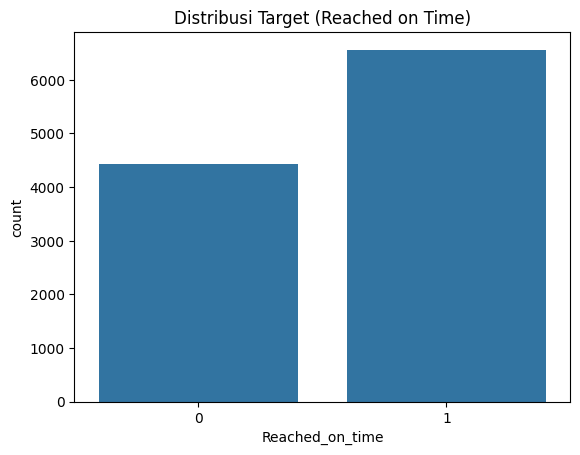

Reached_on_time
1    0.596691
0    0.403309
Name: proportion, dtype: float64

In [11]:
df.rename(columns={'Reached.on.Time_Y.N': 'Reached_on_time'}, inplace=True)

sns.countplot(x='Reached_on_time', data=df)
plt.title("Distribusi Target (Reached on Time)")
plt.show()

df['Reached_on_time'].value_counts(normalize=True)


**Ketepatan Waktu Pengiriman**

    Grafik terakhir menunjukkan ketidakseimbangan yang signifikan dalam variabel target "Reached_on_time". Jumlah pengiriman yang tidak tepat waktu (nilai 1) jauh lebih banyak daripada yang tepat waktu (nilai 0). Ini menunjukkan potensi masalah dalam rantai pasokan atau logistik perusahaan. Analisis lebih lanjut diperlukan untuk mengidentifikasi penyebab keterlambatan.

Kesimpulannya, fokus utama analisis harus diarahkan pada pemahaman faktor-faktor yang menyebabkan keterlambatan pengiriman. Data lain yang tersedia (seperti mode pengiriman, lokasi gudang, dll.) perlu diintegrasikan untuk mengidentifikasi pola dan akar penyebab masalah ini.

## C. Cek Distribusi Kolom Kategorikal

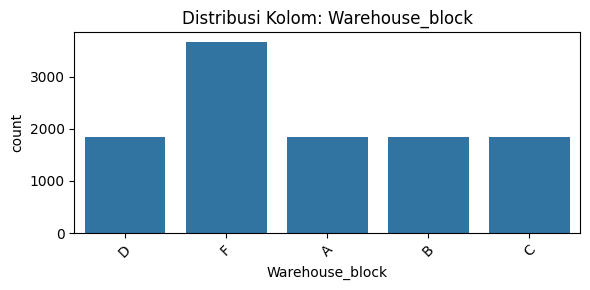

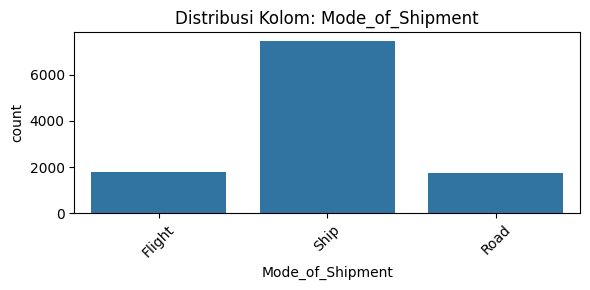

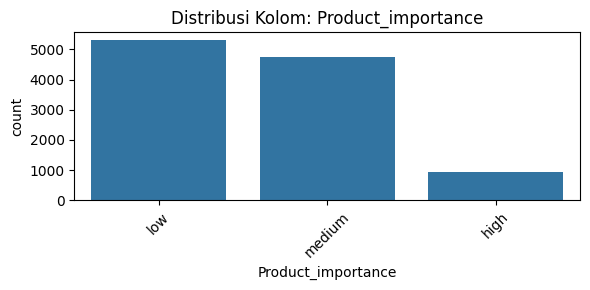

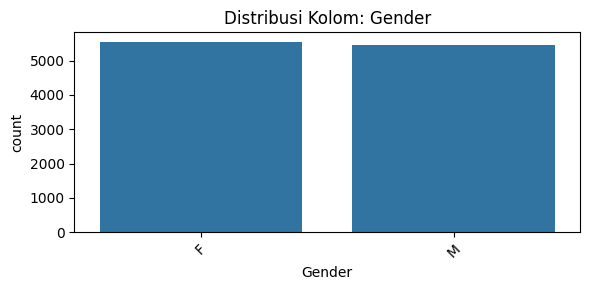

In [9]:
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribusi Kolom: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Mode Pengiriman**: 
    
    Distribusi "Mode of Shipment" menunjukkan bahwa sebagian besar pengiriman dilakukan melalui laut ("Ship"). Jika pengiriman laut lebih rentan terhadap keterlambatan, ini bisa menjadi faktor utama penyebab ketidaktepatan waktu. Analisis lebih lanjut diperlukan untuk membandingkan tingkat ketepatan waktu antar moda pengiriman.

**Pentingnya Produk**: 

    Distribusi "Product Importance" menunjukkan bahwa sebagian besar produk yang dikirimkan memiliki tingkat kepentingan "low" dan "medium". Jika tingkat kepentingan produk berkorelasi dengan prioritas pengiriman, ini bisa menjelaskan mengapa beberapa pengiriman terlambat. Analisis lebih lanjut diperlukan untuk melihat apakah ada hubungan antara tingkat kepentingan produk dan ketepatan waktu pengiriman.

**Lokasi Gudang**: 

    Distribusi "Warehouse_block" menunjukkan distribusi yang relatif merata di antara blok-blok gudang. Namun, analisis lebih lanjut diperlukan untuk melihat apakah ada perbedaan tingkat ketepatan waktu pengiriman antar blok gudang. Mungkin ada perbedaan efisiensi operasional di antara blok-blok tersebut.

**Gender** :

    Distribusi pada grafik menunjukkan distribusi jumlah responden berdasarkan gender. Terlihat bahwa jumlah responden laki-laki (M) dan perempuan (F) hampir seimbang.  Tidak ada gender yang secara signifikan mendominasi dalam data ini.


## D. Korelasi Fitur Numerik

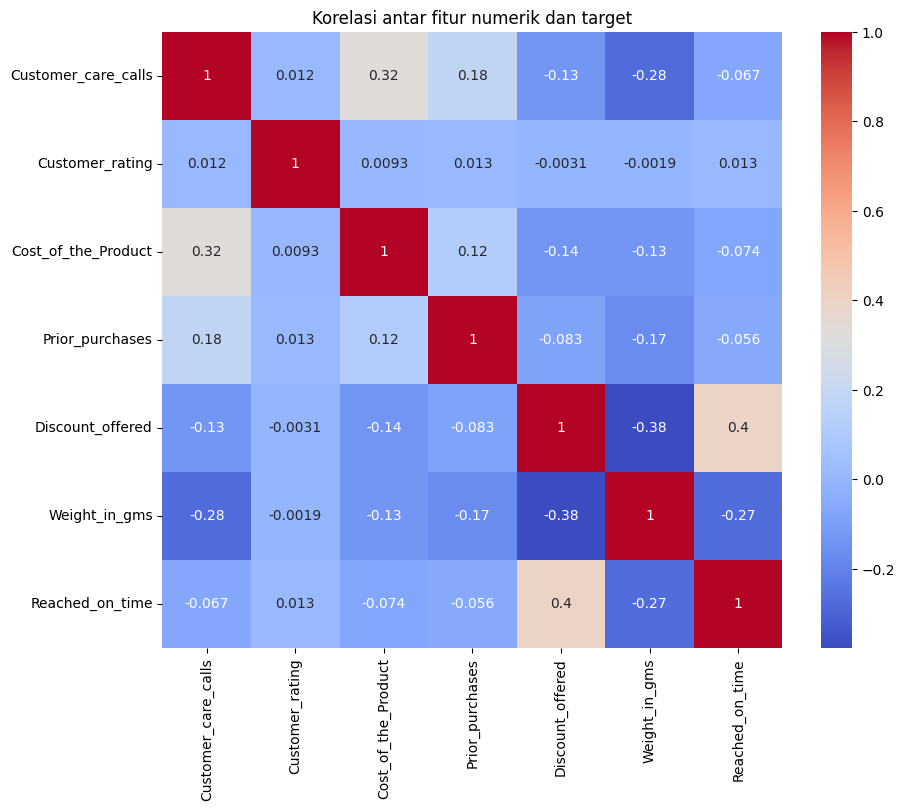

In [12]:
numeric_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols + ['Reached_on_time']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur numerik dan target")
plt.show()


Grafik tersebut menunjukkan matriks korelasi antar variabel numerik. Beberapa insight yang bisa didapatkan:
- Korelasi Positif Kuat: Tidak ada korelasi positif yang sangat kuat (>0.7) antara variabel-variabel yang ditampilkan.
- Korelasi Positif Sedang: Terlihat beberapa korelasi positif sedang, misalnya antara Cost_of_the_Product dan Customer_care_calls. Ini menunjukkan bahwa semakin tinggi biaya produk, semakin banyak panggilan ke layanan pelanggan.
- Korelasi Negatif Sedang: Ada beberapa korelasi negatif sedang, misalnya antara Discount_offered dan Weight_in_gms. Ini menunjukkan kemungkinan bahwa produk dengan diskon lebih tinggi cenderung memiliki berat yang lebih rendah. Juga antara Discount_offered dan Reached_on_time, yang menunjukkan kemungkinan diskon mempengaruhi ketepatan waktu pengiriman.
- Korelasi Lemah: Sebagian besar korelasi antar variabel relatif lemah (<0.3). Ini menunjukkan bahwa variabel-variabel tersebut relatif independen satu sama lain.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang dilakukan:
1. Menghapus Missing Values dan data duplikat
2. Normalisasi fitur numerik
3. Deteksi dan Penanganan Outlier
4. Encoding Data Kategorikal
5. Drop kolom yang tidak diperlukan
6. Memisahkan fitur dan label

## A. Hapus missing values dan duplikat

In [15]:
df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

C:\Users\elyzi\AppData\Local\Temp\ipykernel_10840\2845060468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\elyzi\AppData\Local\Temp\ipykernel_10840\2845060468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


## B. Normalisasi Fitur Numerik

In [16]:
numeric_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


C:\Users\elyzi\AppData\Local\Temp\ipykernel_10840\31543514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


## C. Deteksi dan penanganan Outlier

In [17]:
# Contoh pakai Z-score
from scipy.stats import zscore

z_scores = np.abs(zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]  # keep only values with z < 3


## D. Encode variabel Data Kategorikal

In [19]:
# Label Encoding : Gender & Product Importance
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})

#One-Hot Encoding : Warehouse Block & Mode of Shipment
df = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment'], drop_first=True)

## E. Drop Kolom ID

In [ ]:
df.drop(columns=['ID'], inplace=True)

## F. Pisahkan Fitur & Label

In [23]:
X = df.drop('Reached_on_time', axis=1)
y = df['Reached_on_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
